Импортируем нужные библиотеки.

In [1]:
import matplotlib as mpl

import matplotlib.pyplot as plt
plt.style.use('default')

import pandas as pd
import xgboost as xgb
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#!pip install catboost
import catboost

In [2]:
big_groups = {
    'auto' : 
    [
        'Обслуживание существующего автомобиля (АЗС)',
        'Автодилеры и автосервис',
        'Обслуживание существующего автомобиля (автозапчасти, автосервис)',
        'Оплата штрафов',
        'Обслуживание существующего автомобиля (автомойки)',
        'Обслуживание существующего автомобиля (шиномонтаж)',
        'Обслуживание существующего автомобиля (автозапчасти)',
        'Автодилеры (мотоциклы)',
        'Обслуживание существующего автомобиля (эвакуация)',
        'Обслуживание существующего автомобиля (оплата парковки)',
        'Обслуживание существующего автомобиля (утилизация автотранспорта)',
        'Снегоходы',
        'Страховка',
    ],
    
    
    'travels' : 
    [
        'Авиабилеты',
        'Аренда недвижимости',
        'Duty-free',
        'Прочие отели (а также airbnb, booking)',
        'Ж\\Д',
        'Кемпинги и трейлер-парки',  
        'Прочие отели (аппартаменты)',
        'Сетевые отели',
        'Неклассифицированные расходы в аэропортах',
        'Покупка валюты',
        'Дом на колесах',
    ],
    
    
    'child' : 
    [
        'Магазин игрушек',
        'Детская одежда',
        'Начальное образование',
        'Центры развития и детские сады',
    ],
    
    
    'entertainment' : 
    [
        'Видеоигры',
        'Кинотеатры',
        'Развлекательные комплексы и боулинг',
        'Различные активности',
        'Морские и речные прогулки',
        'Театры и другие события',
        'Луна-парки, океанариумы и цирки',
        'Зоопарки, океанариумы, дельфинарии, ручные еноты',
    ],
    
    
    'transport' : 
    [
        'Такси и каршеринги',
        'Метро (паромы и Ж\\Д аналоги)',
        'Госуслуги (транспорт, некоторые музеи, оплата кружков)',
        'Автобусы',
        'Оплата проезда',
    ],
    
    
    'sport' : 
    [
        'Спорт',
        'Билеты на спортивные матчи, спортивные клубы и фитнес-центры',
        'Спортивная одежда',
        'Спортивные и фитнес-клубы',
        'Гольф',
        'Бассейны',
        'Велоспорт (покупка велосипеда  или комплектующих)',
        'Водный спорт (лодки и дайвинг)',
        'Водный спорт (яхты)',
    ],
    
    
    'constructing' :
    [
        'Строительные материалы',
        'Строительные материалы (двери)',
        'Строительные материалы (комплектующие, свет, сантехника)',
        'Строительные материалы (краски, обои)',
        'Строительные материалы (лакокрасочные материалы)',
        'Строительные подрядчики',
        'Строительные товары, спортивные тренажёры и охранное оборудование',
        'Предметы декора',
        'Натяжные потолки',
        'Водопроводные и отопительные системы',
        'Камины и печи',
        'Мебель и товары для дома', 
        'Электромонтажные работы и оборудование (свет)',
        'Электромонтажные работы и оборудование (сигнализации, телекоммуникации, антенны)',
        'Кондиционеры, водосборники и другие коммуникации',
        'Архитектурные и инженерно-геодезические услуги',
        'Бетонные работы',
        'Окна и двери',
    ],
    
    
    'health' : 
    [
        'Аптеки',
        'Больницы и поликлинники',
        'Стоматологии',
        'Очки и линзы',
        'Скорая помощь',
        'Медицинское оборудование (ортопедические товары)',
        'Оздоровительные процедуры и санатории',
        'Медицинские анализы',
        'Медицинское оборудование (разное)',
        'Медицинское оборудование (слуховые аппараты)',
        'Остеопаты',
        'Ортопедия',
        'Оптометристы и офтальмологи',
        'Мануальные терапевты',
    ],
    
    'alco_smoke' :
    [
        'Алкогольный магазин',
        'Винодельни и пивоварни',
        'Табачные магазины',
    ],
    
    
    'car_renting' :
    [
        'Аренда автотранспорта',
        'Аренда лодок',
        'Аренда оборудования для грузовиков и трейлеров',
        'Аренда трейлеров или картинг',
        'Каршеринг или аренда автотранспорта',
    ],
    
    'home_food' :
    [
        'Несетевые супермаркеты и продуктовые магазины',
        'Сетевые супермаркеты и продуктовые магазины',
        'Мясо и морепродукты',
        'Молочные продукты и мороженное',
        
    ],
    
    'online_transactions' :
    [
        'Онлайн-магазины',
        'Онлайн-сервисы',
        'Онлайн-товары',
        'Онлайн-услуги',
    ],
    
    'appliances' :
    [
        'Бытовая техника (электробритвы)',
        'Бытовая техника; компьютерная техника; мобильная техника',
        'Компьютерная техника',
        'Компьютерная техника (принтеры и картриджи)',
        'Мобильная техника',
    ],
    
    
    'laundries' :
    [
        'Услуги прачечных',
        'Услуги химчистки',
    ],
    
    'law' :
    [
        'Судебные расходы и алименты',
        'Юридические услуги и адвокаты',
        'Консультационные и нотариальные услуги',
    ]
}

In [3]:
descr = pd.read_excel('data/small_group_description.xlsx')

In [4]:
descr

,Unnamed: 0,name,code
0,0,Оплата телефона и связи,0
1,1,Каршеринг или аренда автотранспорта,1
2,2,Такси и каршеринги,2
3,3,Несетевые супермаркеты и продуктовые магазины,3
4,4,Метро (паромы и Ж\Д аналоги),4
...,...,...,...
194,194,Снегоходы,194
195,195,Ортопедия,195
196,196,Бетонные работы,196
197,197,Обслуживание существующего автомобиля (утилиза...,197


In [5]:
# подготовим словарь для df.map()
descr = pd.read_excel('data/small_group_description.xlsx')
small_name_to_id = dict(zip(descr.name, descr.code))
big_name_to_id = dict([(k, str(1000 + i)) for i, k in enumerate(big_groups.keys())])


small_to_big_mapping = []
for key, array in big_groups.items():
    print(key, array)
    small_to_big_mapping += [(small_name_to_id[v], big_name_to_id[key]) for v in array  if v in small_name_to_id.keys()]
print(small_to_big_mapping)
grouped_names = []
for k, v in big_groups.items():
    grouped_names += v
    
for ungrouped in set(small_name_to_id.keys()).difference(set(grouped_names)):
    index = small_name_to_id[ungrouped]
    small_to_big_mapping.append((index, 0))
    
small_to_big_mapping = dict(small_to_big_mapping)

auto ['Обслуживание существующего автомобиля (АЗС)', 'Автодилеры и автосервис', 'Обслуживание существующего автомобиля (автозапчасти, автосервис)', 'Оплата штрафов', 'Обслуживание существующего автомобиля (автомойки)', 'Обслуживание существующего автомобиля (шиномонтаж)', 'Обслуживание существующего автомобиля (автозапчасти)', 'Автодилеры (мотоциклы)', 'Обслуживание существующего автомобиля (эвакуация)', 'Обслуживание существующего автомобиля (оплата парковки)', 'Обслуживание существующего автомобиля (утилизация автотранспорта)', 'Снегоходы', 'Страховка']
travels ['Авиабилеты', 'Аренда недвижимости', 'Duty-free', 'Прочие отели (а также airbnb, booking)', 'Ж\\Д', 'Кемпинги и трейлер-парки', 'Прочие отели (аппартаменты)', 'Сетевые отели', 'Неклассифицированные расходы в аэропортах', 'Покупка валюты', 'Дом на колесах']
child ['Магазин игрушек', 'Детская одежда', 'Начальное образование', 'Центры развития и детские сады']
entertainment ['Видеоигры', 'Кинотеатры', 'Развлекательные комплексы 

In [6]:
big_name_to_id

{'auto': '1000',
 'travels': '1001',
 'child': '1002',
 'entertainment': '1003',
 'transport': '1004',
 'sport': '1005',
 'constructing': '1006',
 'health': '1007',
 'alco_smoke': '1008',
 'car_renting': '1009',
 'home_food': '1010',
 'online_transactions': '1011',
 'appliances': '1012',
 'laundries': '1013',
 'law': '1014'}

In [7]:
!rm -rf data_v1.zip.1

"rm" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [0]:
!wget "https://storage.yandexcloud.net/datasouls-competitions/onti/data_final.zip"
!unzip data_final.zip

--2020-03-05 07:32:47--  https://storage.yandexcloud.net/datasouls-competitions/onti/data_final.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328655228 (313M) [application/zip]
Saving to: ‘data_final.zip’

data_final.zip      100%[===================>] 313.43M  20.4MB/s    in 17s     

2020-03-05 07:33:05 (19.0 MB/s) - ‘data_final.zip’ saved [328655228/328655228]

Archive:  data_final.zip
   creating: data_final/
  inflating: data_final/test.csv     
   creating: __MACOSX/
   creating: __MACOSX/data_final/
  inflating: __MACOSX/data_final/._test.csv  
  inflating: data_final/small_group_description.xlsx  
  inflating: __MACOSX/data_final/._small_group_description.xlsx  
  inflating: data_final/train_target.csv  
  inflating: __MACOSX/data_final/._train_target.csv  
  inflating: data_

In [0]:
!ls

data  data_v1.zip  __MACOSX  sample_data


In [0]:
#client_dk

In [0]:
!wget "https://storage.yandexcloud.net/datasouls-competitions/onti/data_final.zip"
!unzip data_final.zip

--2020-03-05 07:40:22--  https://storage.yandexcloud.net/datasouls-competitions/onti/data_final.zip
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328655228 (313M) [application/zip]
Saving to: ‘data_final.zip.1’

data_final.zip.1    100%[===================>] 313.43M  20.7MB/s    in 16s     

2020-03-05 07:40:39 (19.3 MB/s) - ‘data_final.zip.1’ saved [328655228/328655228]

Archive:  data_final.zip
replace data_final/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data_final/test.csv     
  inflating: __MACOSX/data_final/._test.csv  
  inflating: data_final/small_group_description.xlsx  
  inflating: __MACOSX/data_final/._small_group_description.xlsx  
  inflating: data_final/train_target.csv  
  inflating: __MACOSX/data_final/._train_target.csv  
  inflating: data_final/tra

In [0]:
# transactions_train=pd.read_csv('/content/drive/My Drive/submissions_nti/transactions_train_v3.csv')
# transactions_train=pd.read_csv('/content/drive/My Drive/submissions_nti/transactions_train_v3.csv')
# train_target=pd.read_csv('data/train_target.csv')

In [6]:
transactions_train=pd.read_csv('data/transactions_train.csv')
train_target=pd.read_csv('data/train_target.csv')

In [7]:
train_target


,client_dk,27,32,41,45,67,73,81,88
0,39762,1,0,0,0,0,0,0,0
1,10586,0,0,0,1,0,0,0,0
2,40115,0,1,0,0,0,0,0,0
3,34543,0,0,0,1,0,0,0,0
4,5372,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
24995,20679,0,0,0,1,0,0,0,0
24996,18570,0,1,0,0,0,0,0,0
24997,45745,0,0,1,1,0,0,0,0
24998,4899,0,0,0,0,0,0,0,0


In [19]:
transactions_val=pd.read_csv('data/transactions_test.csv')
val_id=pd.read_csv('data/test.csv')

In [10]:
transactions_train['big_group'] = transactions_train['small_group'].map(small_to_big_mapping)
transactions_val['big_group'] = transactions_val['small_group'].map(small_to_big_mapping)

In [11]:
diffed_train = pd.read_csv("diffs_train.csv")

In [12]:
diffed_val = pd.read_csv("diffs_val.csv")

In [16]:
diffed_rur_train = pd.read_csv("diffs_rur_train.csv")
diffed_rur_val = pd.read_csv("diffs_rur_train.csv")

In [19]:
diffed_big_train = pd.read_csv("diffs_big_train.csv")
diffed_big_val = pd.read_csv("diffs_big_val.csv")

In [23]:
diffed_big_rur_train = pd.read_csv("diffs_big_rur_train.csv")
diffed_big_rur_val = pd.read_csv("diffs_big_rur_val.csv")

In [13]:
transactions_train['diff_prev'] = diffed_train["0"]
transactions_val['diff_prev'] = diffed_val["0"]

In [18]:
del diffed_rur_train
del diffed_rur_val

In [17]:
transactions_train['diff_prev_rur'] = diffed_rur_train["0"]
transactions_val['diff_prev_rur'] = diffed_rur_val["0"]
transactions_train['diff_prev_rur_abs'] = transactions_train['diff_prev_rur'].abs()
transactions_val['diff_prev_rur_abs'] = transactions_val['diff_prev_rur'].abs()

In [25]:
del diffed_big_rur_train

In [26]:
del diffed_big_rur_val

In [15]:
# transactions_train['diff_prev_big']

0                  1.0
1                  2.0
2                  3.0
3                  4.0
4                  5.0
               ...    
21891974    21891975.0
21891975    21891976.0
21891976    21891977.0
21891977    21891978.0
21891978           NaN
Name: diff_prev_big, Length: 21891979, dtype: float64

In [20]:
transactions_train['diff_prev_big'] = diffed_big_train["0"]
transactions_val['diff_prev_big'] = diffed_big_val["0"]

In [24]:
transactions_train['diff_prev_big_rur'] = diffed_big_rur_train["0"]
transactions_val['diff_prev_big_rur'] = diffed_big_rur_val["0"]
transactions_train['diff_prev_big_rur_abs'] = transactions_train['diff_prev_big_rur'].abs()
transactions_val['diff_prev_big_rur_abs'] = transactions_val['diff_prev_big_rur'].abs()

In [30]:
x_data = pd.read_csv("y_data_final_p832/x_data_final_p832.csv")
x_val = pd.read_csv("y_data_final_p832/x_val_final_p832.csv")
y_data =pd.read_csv("y_data_final_p832/y_data_final_p832.csv")

In [39]:
transactions_train2 = transactions_train[int(21891978/2)]

In [40]:
train_target2 = train_target[:int(21891978/2)]

In [19]:
def proc_data_1(transactions, target):
    agg_features=transactions.groupby('client_dk')['amount'].agg(['sum','mean','std','min','max', 'count']).reset_index()
    data=pd.merge(target,agg_features,on='client_dk')
    return data
def proc_data_sg(transactions, data):
    counter_df=transactions.groupby(['client_dk','small_group'])['amount'].count()
    # print(counter_df)
    cat_counts=counter_df.reset_index().pivot(index='client_dk', \
                                                      columns='small_group',values='amount')
    # cat_counts=cat_counts.fillna(0)
    cat_counts.columns=['small_group_count_'+str(i)  for i in cat_counts.columns]
    # print(cat_counts.head())
    data=pd.merge(data,cat_counts.reset_index())
    return data
def proc_data_sg_2(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'small_group'])['amount'].agg(['sum','mean','min','max', 'std']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='small_group', values=['sum','mean','min','max', 'std'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["small_group_" + i + "_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())
    return data
def proc_data_sg_3(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'small_group'])['trans_date'].agg(['std']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='small_group', values=['std'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["small_group_" + i + "_tr_date_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())
    return data

def proc_data_sg_diff_data(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'small_group'])['diff_prev'].agg(['mean','min','max', 'std']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='small_group', values=['mean','min','max', 'std'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["small_group_" + i + "_diff_prev_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())
    return data

def proc_data_sg_diff_rur_data(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'small_group'])['diff_prev_rur'].agg(['sum', 'mean', 'max', 'min', 'median']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='small_group', values=['sum', 'mean', 'max', 'min', 'median'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["small_group_" + i + "_diff_prev_rur2_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())

    agg_features=transactions.groupby(['client_dk', 'small_group'])['diff_prev_rur_abs'].agg(['mean','min','max', 'std', 'median']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='small_group', values=['mean','min','max', 'std', 'median'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["small_group_" + i + "_diff_prev_rur_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())

    return data

In [28]:

def proc_data_bg(transactions, data):
    counter_df=transactions.groupby(['client_dk','big_group'])['amount'].count()
    cat_counts=counter_df.reset_index().pivot(index='client_dk', \
                                                      columns='big_group',values='amount')
    cat_counts.columns=['big_group_count_'+str(i)  for i in cat_counts.columns]
    data=pd.merge(data,cat_counts.reset_index())
    return data

def proc_data_bg_2(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'big_group'])['amount'].agg(['sum','mean','min','max', 'std']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='big_group', values=['sum','mean','min','max', 'std'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["big_group_" + i + "_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())
    return data

def proc_data_bg_3(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'big_group'])['trans_date'].agg(['std']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='big_group', values=['std'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["big_group_" + i + "_tr_date_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())
    return data
def proc_data_bg_diff_data(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'big_group'])['diff_prev_big'].agg(['mean','min','max', 'std']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='big_group', values=['mean','min','max', 'std'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["big_group_" + i + "_diff_prev_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())
    return data

def proc_data_bg_diff_rur_data(transactions, data):
    agg_features=transactions.groupby(['client_dk', 'big_group'])['diff_prev_big_rur'].agg(['sum', 'mean', 'max', 'min', 'median']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='big_group', values=['sum', 'mean', 'max', 'min', 'median'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["big_group_" + i + "_diff_prev_rur2_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())

    agg_features=transactions.groupby(['client_dk', 'big_group'])['diff_prev_big_rur_abs'].agg(['mean','min','max', 'std', 'median']).reset_index()
    agg_features = agg_features.pivot(index='client_dk', columns='big_group', values=['mean','min','max', 'std', 'median'])
    # agg_features = agg_features.fillna(0)
    agg_features.columns = ["big_group_" + i + "_diff_prev_rur_" + str(j) for i, j in agg_features.columns]
    data = pd.merge(data, agg_features.reset_index())

    return data

In [20]:

def proc_data_nd(transactions, data):
    transactions["nd"] = transactions["trans_date"] % 7
    ddd_f = transactions.groupby(['client_dk', 'nd'])["amount"].agg(['sum','mean','max', 'count', 'std','min']).reset_index()
    ddd_f = ddd_f.pivot(index='client_dk', columns='nd', values=['sum','mean','max', 'count' , 'std','min']).reset_index()

    sum_max = ddd_f["sum"].idxmax(axis=1)
    
    mean_max = ddd_f["mean"].idxmax(axis=1)
    count_max = ddd_f["count"].idxmax(axis=1)

    ddd_f.columns = ["nd_" + i + "_" + str(j)  if not "client" in i else "client_dk" for i, j in ddd_f.columns]
    ddd_f["nd_sum_max"] = sum_max
    ddd_f["nd_mean_max"] = mean_max
    ddd_f["nd_count_max"] = count_max
    # print(ddd_f)
    data = pd.merge(data, ddd_f.reset_index())
    # data = pd.merge(data, ddd_f.reset_index(), on='client_id')
    
    return data

In [21]:
def proc_data_nd2(transactions, data):
    transactions["nd2"] = transactions["trans_date"] // 7
    ddd_f = transactions.groupby(['client_dk', 'nd2'])["amount"].agg(['sum','mean','max', 'count', 'std','min']).reset_index()
    ddd_f = ddd_f.pivot(index='client_dk', columns='nd2', values=['sum','mean','max', 'count', 'std','min']).reset_index()

    sum_max = ddd_f["sum"].idxmax(axis=1)
    
    mean_max = ddd_f["mean"].idxmax(axis=1)
    count_max = ddd_f["count"].idxmax(axis=1)

    ddd_f.columns = ["nd2_" + i + "_" + str(j)  if not "client" in i else "client_dk" for i, j in ddd_f.columns]
    ddd_f["nd2_sum_max"] = sum_max
    ddd_f["nd2_mean_max"] = mean_max
    ddd_f["nd2_count_max"] = count_max
    # print(ddd_f)
    data = pd.merge(data, ddd_f.reset_index())
    # data = pd.merge(data, ddd_f.reset_index(), on='client_id')
    
    return data

In [22]:
def proc_data_md(transactions, data):
    transactions["md"] = transactions["trans_date"] % ((7*4) + 2)
    ddd_f = transactions.groupby(['client_dk', 'md'])["amount"].agg(['sum','mean','max', 'count', 'std','min']).reset_index()
    ddd_f = ddd_f.pivot(index='client_dk', columns='md', values=['sum','mean','max', 'count', 'std','min']).reset_index()

    sum_max = ddd_f["sum"].idxmax(axis=1)
    
    mean_max = ddd_f["mean"].idxmax(axis=1)
    count_max = ddd_f["count"].idxmax(axis=1)

    ddd_f.columns = ["md_" + i + "_" + str(j)  if not "client" in i else "client_dk" for i, j in ddd_f.columns]
    ddd_f["md_sum_max"] = sum_max
    ddd_f["md_mean_max"] = mean_max
    ddd_f["md_count_max"] = count_max
    # print(ddd_f)
    data = pd.merge(data, ddd_f.reset_index())
    # data = pd.merge(data, ddd_f.reset_index(), on='client_id')
    
    return data

In [23]:

def proc_data_md2(transactions, data):
    transactions["md2"] = transactions["trans_date"] // ((7*4) + 2)
    ddd_f = transactions.groupby(['client_dk', 'md2'])["amount"].agg(['sum','mean','max', 'count', 'std','min']).reset_index()
    ddd_f = ddd_f.pivot(index='client_dk', columns='md2', values=['sum','mean','max', 'count', 'std','min']).reset_index()

    sum_max = ddd_f["sum"].idxmax(axis=1)
    
    mean_max = ddd_f["mean"].idxmax(axis=1)
    count_max = ddd_f["count"].idxmax(axis=1)

    ddd_f.columns = ["md2_" + i + "_" + str(j)  if not "client" in i else "client_dk" for i, j in ddd_f.columns]
    ddd_f["md2_sum_max"] = sum_max
    ddd_f["md2_mean_max"] = mean_max
    ddd_f["md2_count_max"] = count_max
    # print(ddd_f)
    data = pd.merge(data, ddd_f.reset_index())
    # data = pd.merge(data, ddd_f.reset_index(), on='client_id')
    
    return data

In [42]:
data2 = proc_data_1(transactions_train2, train_target2)
data2 = proc_data_sg(transactions_train2, data2)
data2 = proc_data_sg_2(transactions_train2, data2)
data2 = proc_data_sg_diff_data(transactions_train2, data2)
data2 = proc_data_sg_diff_rur_data(transactions_train2, data2)
data2 = proc_data_nd(transactions_train2, data2)
data2 = proc_data_nd2(transactions_train2, data2)
data2 = proc_data_md(transactions_train2, data2)
data2 = proc_data_md2(transactions_train2, data2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
data2

,client_dk,27,32,41,45,67,73,81,88,sum,...,md2_min_2,md2_min_3,md2_min_4,md2_min_5,md2_min_6,md2_min_7,md2_min_8,md2_sum_max,md2_mean_max,md2_count_max
0,39762,1,0,0,0,0,0,0,0,11100.161,...,1.001,1.131,0.872,0.962,1.679,1.349,2.156,5,4,5
1,10586,0,0,0,1,0,0,0,0,17812.660,...,0.051,0.048,0.051,0.103,0.048,0.048,2.030,1,1,1
2,40115,0,1,0,0,0,0,0,0,10085.991,...,4.834,3.850,0.051,4.748,3.384,1.797,NaN,4,4,4
3,34543,0,0,0,1,0,0,0,0,37566.551,...,1.402,7.203,2.823,1.489,1.450,5.318,NaN,1,2,0
4,5372,0,0,0,1,0,0,0,0,2627.945,...,1.797,1.692,0.096,2.053,0.532,25.666,NaN,2,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24897,20679,0,0,0,1,0,0,0,0,29299.504,...,0.677,2.721,2.053,2.596,3.542,1.329,NaN,5,5,0
24898,18570,0,1,0,0,0,0,0,0,30539.618,...,4.689,2.417,1.997,1.767,1.257,1.464,4.684,4,4,0
24899,45745,0,0,1,1,0,0,0,0,4672.753,...,0.051,1.353,0.770,0.508,0.580,0.580,1.006,6,6,6
24900,4899,0,0,0,0,0,0,0,0,54643.488,...,0.097,4.254,0.333,5.133,5.647,4.723,7.649,1,1,1


In [83]:
qqq = list(set(data2["client_dk"]))

In [88]:
train_target_temp = train_target.copy()

In [89]:
train_target_temp.index = train_target_temp.client_dk

In [90]:
train_target2 = train_target_temp.loc[qqq, :]

In [91]:
train_target2

,client_dk,27,32,41,45,67,73,81,88
client_dk,,,,,,,,,
0,0,0,0,0,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0
3,3,0,0,0,1,0,0,0,0
4,4,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
49992,49992,0,0,0,1,0,0,0,0
49995,49995,0,0,0,1,0,0,0,0
49996,49996,0,1,0,0,0,0,0,0


In [79]:
data_new = pd.concat([data, data2])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [92]:
target_new = pd.concat([train_target, train_target2])

In [97]:
data_new.shape

(49902, 4584)

In [98]:
data_new.index = list(range(data_new.shape[0]))

In [99]:
target_new.index = list(range(data_new.shape[0]))

In [101]:
data_new

,27,32,41,45,67,73,81,88,client_dk,count,...,small_group_sum_diff_prev_rur2_92,small_group_sum_diff_prev_rur2_93,small_group_sum_diff_prev_rur2_94,small_group_sum_diff_prev_rur2_95,small_group_sum_diff_prev_rur2_96,small_group_sum_diff_prev_rur2_97,small_group_sum_diff_prev_rur2_98,small_group_sum_diff_prev_rur2_99,std,sum
0,1,0,0,0,0,0,0,0,39762,1085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.723429,24395.743
1,0,0,0,1,0,0,0,0,10586,1227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18160233.0,73.038448,26796.862
2,0,1,0,0,0,0,0,0,40115,565,...,NaN,NaN,5665624.0,NaN,NaN,NaN,NaN,NaN,50.650327,15207.445
3,0,0,0,1,0,0,0,0,34543,713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.845396,70059.979
4,0,0,0,1,0,0,0,0,5372,670,...,NaN,NaN,NaN,NaN,19130826.0,NaN,NaN,NaN,28.664883,8099.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49897,0,0,0,1,0,0,0,0,20679,594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.894740,29299.504
49898,0,1,0,0,0,0,0,0,18570,547,...,NaN,NaN,9348704.0,NaN,NaN,3125335.0,NaN,NaN,111.255212,30539.618
49899,0,0,1,1,0,0,0,0,45745,426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.604514,4672.753
49900,0,0,0,0,0,0,0,0,4899,740,...,NaN,NaN,7724776.0,NaN,NaN,NaN,NaN,NaN,292.125193,54643.488


In [75]:
target_new

,client_dk,27,32,41,45,67,73,81,88
0,39762.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10586.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,40115.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34543.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5372.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
target_new

,client_dk,27,32,41,45,67,73,81,88
0,39762.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10586.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,40115.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,34543.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5372.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
49992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data = proc_data_1(transactions_train, train_target)
val = proc_data_1(transactions_val, val_id)

In [25]:
data = proc_data_sg(transactions_train, data)
val = proc_data_sg(transactions_val, val)

In [26]:
data = proc_data_sg_2(transactions_train, data)
val = proc_data_sg_2(transactions_val, val)

In [27]:
# data = proc_data_sg_3(transactions_train, data)
# val = proc_data_sg_3(transactions_val, val)

In [28]:
# proc_data_sg_diff_data
data = proc_data_sg_diff_data(transactions_train, data)
val = proc_data_sg_diff_data(transactions_val, val)

In [29]:
# data = 
# proc_data_sg_diff_data
data = proc_data_sg_diff_rur_data(transactions_train, data)
val = proc_data_sg_diff_rur_data(transactions_val, val)

In [38]:
data = proc_data_bg(transactions_train, data)
val = proc_data_bg(transactions_val, val)

In [39]:
data = proc_data_bg_2(transactions_train, data)
val = proc_data_bg_2(transactions_val, val)

In [0]:
# data = proc_data_bg_3(transactions_train, data)
# val = proc_data_bg_3(transactions_val, val)

In [40]:
# proc_data_sg_diff_data
data = proc_data_bg_diff_data(transactions_train, data)
val = proc_data_bg_diff_data(transactions_val, val)

In [41]:
x_data = proc_data_bg_diff_data(transactions_train, x_data)
x_val = proc_data_bg_diff_data(transactions_val, x_val)

NameError: name 'x_data' is not defined

In [ ]:
x_data = proc_data_bg_diff_rur_data(transactions_train, x_data)
x_val = proc_data_bg_diff_rur_data(transactions_val, x_val)

In [42]:
# data = 
# proc_data_sg_diff_data
data = proc_data_bg_diff_rur_data(transactions_train, data)
val = proc_data_bg_diff_rur_data(transactions_val, val)

In [30]:
data = proc_data_nd(transactions_train, data)
val = proc_data_nd(transactions_val, val)

In [31]:
data = proc_data_nd2(transactions_train, data)
val = proc_data_nd2(transactions_val, val)

In [32]:
data = proc_data_md(transactions_train, data)
val = proc_data_md(transactions_val, val)

In [33]:
data = proc_data_md2(transactions_train, data)
val = proc_data_md2(transactions_val, val)

In [34]:
x_data.head()

NameError: name 'x_data' is not defined

In [37]:
data["small_group_sum_diff_prev_rur2_1"][data["bins"] == 0].hist(bins=60, alpha=0.5)
data["small_group_sum_diff_prev_rur2_1"][data["bins"] == 1].hist(bins=60, alpha=0.5)
data["small_group_sum_diff_prev_rur2_1"][data["bins"] == 2].hist(bins=60, alpha=0.5)
data["small_group_sum_diff_prev_rur2_1"][data["bins"] == 3].hist(bins=60, alpha=0.5)

KeyError: 'bins'

In [102]:
common_features=list(set(data_new.columns).intersection(set(val.columns)))

In [103]:
len(common_features) - len(set(data_new.columns))

-8

In [118]:
data[["27", "32", "41", "45", "67", "73", "81", "88"]]

,27,32,41,45,67,73,81,88
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
24995,0,0,0,1,0,0,0,0
24996,0,1,0,0,0,0,0,0
24997,0,0,1,1,0,0,0,0
24998,0,0,0,0,0,0,0,0


In [104]:
y_data=data_new[["27", "32", "41", "45", "67", "73", "81", "88"]]
x_data=data_new[common_features]
x_val=val[common_features]

In [57]:
x_val.shape, x_data.shape

((25000, 4896), (25000, 4896))

In [105]:
groups = [i for i in common_features if "small_group" in i] + [i for i in common_features if "big_group" in i]
# groups

In [121]:
to_drop_2_i = (25000 - x_data[ [i for i in common_features if "group_count" in i] ].isna().sum().sort_values().tail(60))

In [106]:
to_drop_2_i_v = (25000 - x_val[ [i for i in common_features if "group_count_" in i] ].isna().sum().sort_values().tail(45)) #50

In [107]:
# to_drop_2_i_v,len(to_drop_2_i_v)

In [108]:
to_drop_2 = [l[l.rindex("_") +1:] for l in to_drop_2_i_v.index]

In [109]:
to_drop_3 = []
for l in to_drop_2:
    to_drop_3 += ["small_group_" + i + "_" + l for i in ['sum','mean','min','max', 'count', 'std']]
    # to_drop_3 +=["small_group_" + i + "_tr_date_" + l for i in ['std']] 
    #to_drop_3 +=["small_group_" + i + "_diff_prev_" + l for i in ['mean','min','max', 'std']] 
    #to_drop_3 +=["small_group_" + i + "_diff_prev_rur_" + l for i in ['mean','min','max', 'std', 'median']]
    #to_drop_3 +=["small_group_" + i + "_diff_prev_rur2_" + l for i in ['mean','sum', 'max', 'min', 'median']]

In [110]:

len(to_drop_3)

270

In [111]:
x_data = x_data.drop(to_drop_3, axis=1)
x_val = x_val.drop(to_drop_3, axis=1)

In [112]:
common_features=list(set(x_data.columns).intersection(set(x_val.columns)))

In [113]:
groups = [i for i in common_features if "group" in i] + [i for i in common_features if "nd_" in i and not "max" in i[i.rfind("_")+1:]] + [i for i in common_features if "md_" in i and not "max" in i[i.rfind("_")+1:]]+ [i for i in common_features if "md2_" in i and not "max" in i[i.rfind("_")+1:]]+ [i for i in common_features if "nd2_" in i and not "max" in i[i.rfind("_")+1:]]

In [114]:
limits_train = (x_data[groups].max()*1.4 + x_data[groups].mean()*1.4) / 2 
limits_val = (x_val[groups].max()*1.4 + x_val[groups].mean()*1.4) / 2 
limits = limits_train * 0.4 + limits_val * 0.6
limits

small_group_std_10                   2.607471e+04
small_group_sum_diff_prev_rur2_16    1.405300e+10
small_group_sum_diff_prev_rur2_76    1.848942e+08
small_group_sum_59                   3.878885e+04
small_group_count_102                3.968228e+01
                                         ...     
nd2_max_23                           1.187027e+05
nd2_sum_6                            1.068605e+05
nd2_count_2                          8.321811e+01
nd2_std_4                            1.096106e+04
nd2_count_43                         9.582790e+01
Length: 4286, dtype: float64

In [54]:
l = "small_group_sum_diff_prev_rur2_1"
x_data[l][y_data == 0].hist(bins=60, alpha=0.5)
x_data[l][y_data == 2].hist(bins=60, alpha=0.5)
x_data[l][y_data == 1].hist(bins=60, alpha=0.5)
x_data[l][y_data == 3].hist(bins=60, alpha=0.5)

TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [115]:
x_data = x_data.fillna(0)
x_val = x_val.fillna(0)

In [116]:
def proc_limits(d):
    l = "small_group_51"
    for l in groups:
        if  limits[l] != float("nan"):
            d[l] = d[l].clip(0, limits[l])
    return d

In [57]:
def proc_log(d):
    l = "small_group_51"
    for l in groups:
        d["log_" + l] = np.log(d[l]).clip(0, 50)
    return d

In [117]:
x_data = proc_limits(x_data)
x_val = proc_limits(x_val)

In [146]:
x_data = x_data.fillna(0)
x_val = x_val.fillna(0)
######################################

In [0]:
x_data["small_group_max_1"]

0         769.315
1        1035.038
2         222.109
3         109.590
4          40.415
           ...   
29995     454.953
29996     278.531
29997     617.819
29998     378.054
29999     261.820
Name: small_group_max_1, Length: 30000, dtype: float64

In [0]:
def proc_max_small_groups(data):
    groups = [i[i.rfind("_count") + len("_count")+1:] for i in data.columns if "small_group_count" in i]
    print(groups)
    grs_m_o = ["sg_mean_" + str(i) for i in range(1, 20+1)]
    grs_c_o = ["sg_count_" + str(i) for i in range(1, 20+1)]
    data_temp = pd.DataFrame(columns=grs_m_o + grs_c_o + ["client_id"], index=data.index)
    grs_m = list(map(lambda x: "small_group_mean_" + x, groups))
    grs_c = list(map(lambda x: "small_group_count_" + x, groups))
    data_temp["client_id"] = data["client_id"]
    maxq = data.index[-1]
    for j in data.index:
        ss = data[grs_m].iloc[j].sort_values(ascending=False).index[:20]
        data_temp.loc[j, grs_m_o] = [int(i[i.rfind("_") + 1:]) for i in ss]

        ss2 = data[grs_c].iloc[j].sort_values(ascending=False).index[:20]
        data_temp.loc[j, grs_c_o] = [int(i[i.rfind("_") + 1:]) for i in ss2]
        if j % 150 == 0:
            print((j / maxq)*100)
            # print(data_temp)
            # break
    data = pd.merge(data, data_temp, on="client_id")
    return data

In [0]:
x_data2 = proc_max_small_groups(x_data)
x_val2 = proc_max_small_groups(x_val)

In [0]:
grs_m_o = ["sg_mean_" + str(i) for i in range(1, 10+1)]
grs_c_o = ["sg_count_" + str(i) for i in range(1, 10+1)]
for j in grs_m_o + grs_c_o:
    x_data[j] = [int(i[i.rfind("_") + 1:]) for i in x_data[j]]
    x_val[j] = [int(i[i.rfind("_") + 1:]) for i in x_val[j]]

In [0]:
m = x_data[x_data].mean() <= 0.0005
m.index

Index(['small_group_sum_142', 'small_group_sum_5', 'small_group_min_123',
       'small_group_sum_154', 'small_group_min_107', 'small_group_mean_121',
       'small_group_max_31', 'small_group_min_134', 'small_group_mean_128',
       'small_group_max_5',
       ...
       'small_group_146', 'small_group_sum_191', 'small_group_max_169',
       'small_group_mean_125', 'small_group_mean_133', 'small_group_mean_106',
       'small_group_mean_112', 'small_group_max_61', 'small_group_max_109',
       'small_group_max_16'],
      dtype='object', length=1000)

In [0]:
to_drop_1 = [i for i in m.index if m[i] == True]

In [0]:
to_drop_1

['small_group_186',
 'small_group_188',
 'small_group_192',
 'small_group_175',
 'small_group_200',
 'small_group_196',
 'small_group_183',
 'small_group_193',
 'small_group_152',
 'small_group_197',
 'small_group_198',
 'small_group_189',
 'small_group_202',
 'small_group_195']

In [0]:
x_data = x_data.drop(to_drop_1, axis=1)

In [0]:
x_val = x_val.drop(to_drop_1, axis=1)

In [118]:
x_data.to_csv("submissions_nti/x_data_++.csv")
x_val.to_csv("submissions_nti/x_val_++.csv")
y_data.to_csv("submissions_nti/y_data_++.csv")

In [0]:
from sklearn.preprocessing import StandardScaler

Обучим xgboost на текущих признаках.

In [0]:
scaler = StandardScaler()

In [0]:
print(scaler.fit(pd.concat([x_data, x_val])))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [0]:
x_data2 = scaler.transform(x_data)

In [0]:
x_val2 = scaler.transform(x_val)

In [67]:
x_data

,small_group_max_diff_prev_rur2_39,small_group_min_63,small_group_max_diff_prev_rur_155,md_sum_6,big_group_sum_diff_prev_rur2_1013,small_group_max_diff_prev_rur2_33,small_group_median_diff_prev_rur_94,small_group_mean_diff_prev_rur_28,small_group_mean_diff_prev_29,small_group_max_diff_prev_100,...,small_group_min_diff_prev_rur_137,small_group_min_diff_prev_119,small_group_min_91,small_group_min_diff_prev_rur_152,small_group_median_diff_prev_rur_81,small_group_count_190,small_group_max_diff_prev_rur_78,small_group_max_88,small_group_max_diff_prev_rur_48,big_group_sum_1010
0,21157856.0,NaN,NaN,531.596,NaN,NaN,NaN,NaN,1.130651e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299.307
1,NaN,NaN,NaN,700.574,NaN,NaN,NaN,NaN,3.898911e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4903758.0,NaN,NaN,4573.131
2,NaN,NaN,NaN,880.186,NaN,NaN,5665624.0,6947868.0,1.385206e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3113.612
3,NaN,NaN,NaN,667.286,NaN,NaN,NaN,1458971.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8004.971
4,NaN,NaN,NaN,149.430,NaN,NaN,NaN,212688.0,2.011598e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1533.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,8652697.0,NaN,NaN,2571.683,NaN,18798435.0,NaN,1575085.0,8.174107e+06,NaN,...,NaN,NaN,136.782,NaN,NaN,NaN,14745792.0,26.783,NaN,8312.061
24996,NaN,NaN,NaN,1942.252,3125335.0,NaN,12522653.0,8523337.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6475.739
24997,NaN,NaN,NaN,517.550,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3699.156
24998,NaN,NaN,NaN,2028.834,NaN,3945808.0,7724776.0,NaN,7.640994e+06,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16689028.0,NaN,NaN,20194.091


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.008, random_state=13)

In [33]:
x_train = x_train.drop("Unnamed: 0", axis=1)

In [34]:
x_train

,small_group_max_diff_prev_rur2_39,small_group_min_63,small_group_max_diff_prev_rur_155,md_sum_6,small_group_max_diff_prev_rur2_33,small_group_median_diff_prev_rur_94,small_group_mean_diff_prev_rur_28,small_group_mean_diff_prev_29,small_group_max_diff_prev_100,small_group_mean_diff_prev_rur_185,...,small_group_min_diff_prev_rur2_91,small_group_min_diff_prev_rur_137,small_group_min_diff_prev_119,small_group_min_91,small_group_min_diff_prev_rur_152,small_group_median_diff_prev_rur_81,small_group_max_diff_prev_rur_78,small_group_max_88,small_group_max_diff_prev_rur_48,small_group_max_diff_prev_112
1607,15378443.0,0.0,0.0,1738.995,0.0,15383497.0,1.249281e+07,0.000000e+00,0.0,0.0,...,15354551.0,0.0,0.0,17.350,0.0,0.0,21376593.0,0.0,0.0,0.0
15761,0.0,0.0,0.0,657.433,20950213.0,0.0,1.007178e+07,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1845,0.0,0.0,0.0,521.057,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,21295702.0,0.0
24369,0.0,0.0,0.0,1076.780,0.0,0.0,8.589244e+06,7.373533e+06,0.0,0.0,...,18805691.0,0.0,0.0,35.953,0.0,0.0,0.0,0.0,0.0,0.0
336,0.0,0.0,0.0,615.074,0.0,0.0,1.184886e+07,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,20465193.0,0.0,0.0,5068.688,0.0,0.0,1.104466e+06,1.957397e+07,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
24080,0.0,0.0,0.0,1294.492,0.0,0.0,1.057516e+07,1.225198e+07,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,1249.198,0.0,14356558.5,9.380330e+06,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
14512,0.0,0.0,0.0,837.245,11133144.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.0,20062698.0,0.0,0.0,0.0


In [35]:
x_test = x_test.drop("Unnamed: 0", axis=1)

In [36]:
x_val = x_val.drop("Unnamed: 0", axis = 1)

In [37]:
[i for i in x_train.columns if "big" in i]


[]

In [38]:
clssifiers = {}

In [120]:
x_train

,small_group_std_10,small_group_sum_diff_prev_rur2_16,small_group_sum_diff_prev_rur2_76,small_group_sum_59,small_group_count_102,small_group_max_diff_prev_rur2_148,small_group_min_40,small_group_min_diff_prev_60,small_group_median_diff_prev_rur_61,small_group_sum_51,...,small_group_max_diff_prev_rur_1,small_group_max_113,nd2_count_43,small_group_median_diff_prev_rur2_31,small_group_max_diff_prev_rur_94,small_group_mean_diff_prev_rur2_146,md_count_12,small_group_min_diff_prev_24,small_group_median_diff_prev_rur_139,small_group_sum_diff_prev_rur2_5
24706,22.827780,0.0,0.0,0.000,0.0,0.0,0.000,0.000000e+00,0.0,0.000,...,0.0,0.0,29.0,17951861.5,0.0,0.0,44.0,0.0,0.0,1.693462e+09
12377,0.000000,3920935.0,23706227.0,0.000,0.0,0.0,7.251,3.873210e+06,0.0,0.000,...,0.0,0.0,27.0,0.0,0.0,0.0,35.0,0.0,0.0,4.756018e+09
11247,228.533133,0.0,0.0,16.920,0.0,0.0,0.000,6.271350e+05,6045926.0,0.000,...,0.0,0.0,0.0,11654153.0,0.0,0.0,4.0,11230208.0,0.0,7.777110e+08
13588,0.000000,0.0,0.0,0.000,0.0,0.0,0.000,4.256500e+06,0.0,0.000,...,0.0,0.0,11.0,6304337.0,14348916.0,0.0,17.0,0.0,0.0,1.240916e+09
16890,0.000000,0.0,0.0,171.140,1.0,0.0,17.966,1.807740e+06,0.0,1581.032,...,0.0,0.0,29.0,11833895.0,0.0,0.0,54.0,0.0,0.0,4.145277e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,51.944781,0.0,0.0,5.133,0.0,0.0,761.310,0.000000e+00,12374376.0,0.000,...,0.0,0.0,4.0,17041469.0,17102048.0,0.0,26.0,0.0,0.0,3.175967e+09
44732,0.000000,0.0,0.0,0.000,0.0,0.0,11.338,0.000000e+00,4097156.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,2.259493e+07
38158,1192.756551,0.0,0.0,0.000,0.0,0.0,0.000,5.592680e+05,0.0,0.000,...,0.0,0.0,0.0,4609785.0,0.0,0.0,25.0,0.0,0.0,8.502490e+08
860,0.000000,28232392.0,0.0,10.266,0.0,0.0,109.663,2.031974e+07,14731159.0,0.000,...,0.0,0.0,30.0,0.0,0.0,0.0,47.0,0.0,0.0,5.757525e+09


In [49]:
x_train.columns

Index(['small_group_sum_diff_prev_rur2_68',
       'small_group_mean_diff_prev_rur2_15',
       'small_group_min_diff_prev_rur_102',
       'small_group_median_diff_prev_rur2_33',
       'small_group_median_diff_prev_rur2_26',
       'small_group_mean_diff_prev_rur_9',
       'small_group_median_diff_prev_rur2_28',
       'small_group_median_diff_prev_rur_12',
       'small_group_min_diff_prev_rur2_61', 'small_group_std_diff_prev_178',
       ...
       'md2_max_4', 'small_group_min_diff_prev_rur_173',
       'small_group_median_diff_prev_rur_18',
       'small_group_min_diff_prev_rur2_91',
       'small_group_mean_diff_prev_rur_93',
       'small_group_max_diff_prev_rur_165',
       'small_group_median_diff_prev_rur2_162',
       'small_group_min_diff_prev_rur_132',
       'small_group_mean_diff_prev_rur_69',
       'small_group_std_diff_prev_rur_106'],
      dtype='object', length=4342)

In [121]:
clssifiers = {}


In [82]:

some = ["27","73"]
for i in ["27", "32", "41", "45", "67", "73", "81", "88"]:
    print(i)
    if not i in some:
        continue
    cat_clf = catboost.CatBoostClassifier(random_seed=11, task_type="CPU", verbose=1, n_estimators=400, max_depth=4, learning_rate=0.1)
    cat_clf.fit(x_train, y_train[i])
    clssifiers.update({i:cat_clf})

27
0:	learn: 0.6132244	total: 252ms	remaining: 1m 40s
1:	learn: 0.5522112	total: 545ms	remaining: 1m 48s
2:	learn: 0.5033110	total: 784ms	remaining: 1m 43s
3:	learn: 0.4696347	total: 1.05s	remaining: 1m 43s
4:	learn: 0.4454430	total: 1.31s	remaining: 1m 43s
5:	learn: 0.4181387	total: 1.56s	remaining: 1m 42s
6:	learn: 0.3983953	total: 1.83s	remaining: 1m 42s
7:	learn: 0.3859800	total: 2.21s	remaining: 1m 48s
8:	learn: 0.3742255	total: 2.53s	remaining: 1m 49s
9:	learn: 0.3649764	total: 2.81s	remaining: 1m 49s
10:	learn: 0.3581551	total: 3.08s	remaining: 1m 49s
11:	learn: 0.3508099	total: 3.33s	remaining: 1m 47s
12:	learn: 0.3461953	total: 3.58s	remaining: 1m 46s
13:	learn: 0.3430870	total: 3.84s	remaining: 1m 45s
14:	learn: 0.3399255	total: 4.12s	remaining: 1m 45s
15:	learn: 0.3366005	total: 4.36s	remaining: 1m 44s
16:	learn: 0.3341622	total: 4.6s	remaining: 1m 43s
17:	learn: 0.3319430	total: 4.83s	remaining: 1m 42s
18:	learn: 0.3307600	total: 5.07s	remaining: 1m 41s
19:	learn: 0.3291952

158:	learn: 0.2947205	total: 40.9s	remaining: 1m 1s
159:	learn: 0.2944887	total: 41.1s	remaining: 1m 1s
160:	learn: 0.2942743	total: 41.3s	remaining: 1m 1s
161:	learn: 0.2939707	total: 41.5s	remaining: 1m 1s
162:	learn: 0.2938042	total: 41.7s	remaining: 1m
163:	learn: 0.2935552	total: 41.9s	remaining: 1m
164:	learn: 0.2933604	total: 42.1s	remaining: 1m
165:	learn: 0.2932268	total: 42.4s	remaining: 59.7s
166:	learn: 0.2930492	total: 42.6s	remaining: 59.4s
167:	learn: 0.2928361	total: 42.8s	remaining: 59.1s
168:	learn: 0.2926260	total: 43s	remaining: 58.8s
169:	learn: 0.2925348	total: 43.2s	remaining: 58.5s
170:	learn: 0.2923830	total: 43.4s	remaining: 58.2s
171:	learn: 0.2921103	total: 43.7s	remaining: 57.9s
172:	learn: 0.2918977	total: 43.9s	remaining: 57.7s
173:	learn: 0.2918512	total: 44.2s	remaining: 57.4s
174:	learn: 0.2916467	total: 44.5s	remaining: 57.2s
175:	learn: 0.2913936	total: 44.8s	remaining: 57s
176:	learn: 0.2910811	total: 45.1s	remaining: 56.8s
177:	learn: 0.2909001	tot

317:	learn: 0.2676251	total: 1m 18s	remaining: 20.2s
318:	learn: 0.2674863	total: 1m 18s	remaining: 20s
319:	learn: 0.2672628	total: 1m 18s	remaining: 19.7s
320:	learn: 0.2671064	total: 1m 19s	remaining: 19.5s
321:	learn: 0.2669033	total: 1m 19s	remaining: 19.2s
322:	learn: 0.2667110	total: 1m 19s	remaining: 19s
323:	learn: 0.2665412	total: 1m 19s	remaining: 18.7s
324:	learn: 0.2664828	total: 1m 19s	remaining: 18.4s
325:	learn: 0.2662809	total: 1m 20s	remaining: 18.2s
326:	learn: 0.2662614	total: 1m 20s	remaining: 17.9s
327:	learn: 0.2660070	total: 1m 20s	remaining: 17.7s
328:	learn: 0.2659108	total: 1m 20s	remaining: 17.5s
329:	learn: 0.2658124	total: 1m 21s	remaining: 17.2s
330:	learn: 0.2656302	total: 1m 21s	remaining: 17s
331:	learn: 0.2654256	total: 1m 21s	remaining: 16.7s
332:	learn: 0.2654108	total: 1m 21s	remaining: 16.5s
333:	learn: 0.2652793	total: 1m 22s	remaining: 16.2s
334:	learn: 0.2651404	total: 1m 22s	remaining: 16s
335:	learn: 0.2651225	total: 1m 22s	remaining: 15.7s
3

74:	learn: 0.1503600	total: 17.2s	remaining: 1m 14s
75:	learn: 0.1503327	total: 17.4s	remaining: 1m 14s
76:	learn: 0.1503014	total: 17.6s	remaining: 1m 13s
77:	learn: 0.1502398	total: 17.8s	remaining: 1m 13s
78:	learn: 0.1502019	total: 18s	remaining: 1m 13s
79:	learn: 0.1501413	total: 18.2s	remaining: 1m 12s
80:	learn: 0.1500962	total: 18.4s	remaining: 1m 12s
81:	learn: 0.1500668	total: 18.6s	remaining: 1m 12s
82:	learn: 0.1499113	total: 18.8s	remaining: 1m 11s
83:	learn: 0.1498534	total: 19s	remaining: 1m 11s
84:	learn: 0.1497259	total: 19.2s	remaining: 1m 11s
85:	learn: 0.1496450	total: 19.4s	remaining: 1m 10s
86:	learn: 0.1495973	total: 19.6s	remaining: 1m 10s
87:	learn: 0.1493980	total: 19.8s	remaining: 1m 10s
88:	learn: 0.1493597	total: 20s	remaining: 1m 10s
89:	learn: 0.1492480	total: 20.3s	remaining: 1m 9s
90:	learn: 0.1491887	total: 20.5s	remaining: 1m 9s
91:	learn: 0.1491422	total: 20.7s	remaining: 1m 9s
92:	learn: 0.1490662	total: 21s	remaining: 1m 9s
93:	learn: 0.1490190	tot

234:	learn: 0.1361825	total: 52.1s	remaining: 36.5s
235:	learn: 0.1360426	total: 52.3s	remaining: 36.4s
236:	learn: 0.1358915	total: 52.6s	remaining: 36.2s
237:	learn: 0.1357914	total: 52.8s	remaining: 36s
238:	learn: 0.1356962	total: 53.1s	remaining: 35.8s
239:	learn: 0.1355625	total: 53.4s	remaining: 35.6s
240:	learn: 0.1353732	total: 53.6s	remaining: 35.4s
241:	learn: 0.1352670	total: 53.8s	remaining: 35.2s
242:	learn: 0.1351366	total: 54.1s	remaining: 34.9s
243:	learn: 0.1349854	total: 54.3s	remaining: 34.7s
244:	learn: 0.1349111	total: 54.6s	remaining: 34.5s
245:	learn: 0.1347611	total: 54.8s	remaining: 34.3s
246:	learn: 0.1347472	total: 55.1s	remaining: 34.1s
247:	learn: 0.1345927	total: 55.3s	remaining: 33.9s
248:	learn: 0.1345810	total: 55.5s	remaining: 33.7s
249:	learn: 0.1344755	total: 55.8s	remaining: 33.5s
250:	learn: 0.1343895	total: 56s	remaining: 33.3s
251:	learn: 0.1342201	total: 56.3s	remaining: 33.1s
252:	learn: 0.1340283	total: 56.6s	remaining: 32.9s
253:	learn: 0.13

391:	learn: 0.1209564	total: 1m 29s	remaining: 1.83s
392:	learn: 0.1209257	total: 1m 29s	remaining: 1.6s
393:	learn: 0.1208492	total: 1m 29s	remaining: 1.37s
394:	learn: 0.1208220	total: 1m 30s	remaining: 1.14s
395:	learn: 0.1207111	total: 1m 30s	remaining: 913ms
396:	learn: 0.1205891	total: 1m 30s	remaining: 685ms
397:	learn: 0.1205523	total: 1m 30s	remaining: 456ms
398:	learn: 0.1205321	total: 1m 31s	remaining: 228ms
399:	learn: 0.1205052	total: 1m 31s	remaining: 0us
81
88


In [67]:
{i:clssifiers[i].get_all_params() for i in clssifiers}

{'27': {'nan_mode': 'Min',
  'eval_metric': 'Logloss',
  'iterations': 818,
  'sampling_frequency': 'PerTree',
  'leaf_estimation_method': 'Newton',
  'grow_policy': 'SymmetricTree',
  'boosting_type': 'Plain',
  'model_shrink_mode': 'Constant',
  'feature_border_type': 'GreedyLogSum',
  'bayesian_matrix_reg': 0.10000000149011612,
  'l2_leaf_reg': 3,
  'random_strength': 1,
  'rsm': 1,
  'boost_from_average': False,
  'model_size_reg': 0.5,
  'subsample': 0.800000011920929,
  'use_best_model': False,
  'class_names': [0, 1],
  'random_seed': 13,
  'depth': 4,
  'border_count': 254,
  'classes_count': 0,
  'sparse_features_conflict_fraction': 0,
  'leaf_estimation_backtracking': 'AnyImprovement',
  'best_model_min_trees': 1,
  'model_shrink_rate': 0,
  'min_data_in_leaf': 1,
  'loss_function': 'Logloss',
  'learning_rate': 0.009999999776482582,
  'score_function': 'Cosine',
  'task_type': 'CPU',
  'leaf_estimation_iterations': 10,
  'bootstrap_type': 'MVS',
  'max_leaves': 16},
 '32': {

In [ ]:
xgb.XGBClassifier()

In [59]:
#$#$#$#$#$#$#$#$#$ XGBOOST
some = ["27", "32", "41", "45"]
for i in ["27", "32", "41", "45", "67", "73", "81", "88"]:
    print(i)
    if i in some:
        continue
    xgb_clf = xgb.XGBClassifier(random_seed=42, task_type="CPU", verbosity=3, learning_rate=0.048, n_estimators=600, max_depth=4)
    xgb_clf.fit(x_train, y_train[i])
    clssifiers.update({i:xgb_clf})

27
[10:24:01] DEBUG: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\gbm\gbtree.cc:146: Using tree method: 2
[10:24:05] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4


KeyboardInterrupt: 

[10:24:08] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[10:24:09] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[10:24:10] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[10:24:12] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[10:24:13] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[10:24:15] INFO: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\tree\updater_prune.cc:89: tree pruning end, 30 extra nodes, 0 pruned

KeyboardInterrupt: 

KeyboardInterrupt: 

In [76]:
with open('models_v5_chtoto_p832_213123123132.pickle', 'wb') as f:
    pickle.dump(clssifiers, f)

In [112]:
# clssifiers = pickle.load(open('models_v4_cor.pickle', 'rb'))

In [11]:
import pickle

In [39]:
clssifiers = pickle.load(open('models_v5_full+-_818est_data_001_the_best.pickle', 'rb'))

In [109]:
clssifiers["67"] = data_new["67"]
clssifiers["73"] = data_new["73"]
clssifiers["81"] = data_new["81"]
clssifiers["88"] = data_new["88"]


In [66]:
clssifiers

{'27': XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints=None,
               learning_rate=0.048, max_delta_step=0, max_depth=4,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               n_estimators=600, n_jobs=0, num_parallel_tree=1,
               objective='binary:logistic', random_seed=42, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               task_type='CPU', tree_method=None, validate_parameters=False,
               verbosity=3),
 '32': <catboost.core.CatBoostClassifier at 0x20bcca65fc8>,
 '41': <catboost.core.CatBoostClassifier at 0x20bccb30cc8>,
 '45': <catboost.core.CatBoostClassifier at 0x20bccbfbfc8>,
 '67': <catboost.core.CatBoostClassifier at 0x20bcccc5cc8>,
 '73': <catboost.core.CatBoostClassifier at 0x20bccd69f08>,
 '81': <catboost.core

In [70]:
clssifiers = data_new

In [83]:
#### PREDICTOR
predicts = {}
a = 0
for i in clssifiers:
    #if a != 0:
    #    continue
    print(i)
    predicts.update({i:clssifiers[i].predict_proba(x_val)[:, 1]})
    #a +=1

27
32
41
45
67
73
81
88


In [79]:
from sklearn.metrics import roc_auc_score

scores = {i:0 for i in predicts}

In [61]:
####   32 45 73 88
for i in scores:
    scores[i] = roc_auc_score(y_test[i], predicts[i]) 

ValueError: Found input variables with inconsistent numbers of samples: [200, 25000]

In [58]:
scores

{'27': 0.8675474254742547,
 '32': 0.7628379604427508,
 '41': 0.8740699404761905,
 '45': 0.8472946356158034,
 '67': 0.9694010416666667,
 '73': 0.7931578947368421,
 '81': 1.0,
 '88': 0.9435897435897436}

In [44]:
{'27': 0.8675474254742547,
 '32': 0.789330430048993,
 '41': 0.8740699404761905,
 '45': 0.856679411423937,
 '67': 0.9694010416666667,
 '73': 0.7931578947368421,
 '81': 1.0,
 '88': 0.9435897435897436}

{'27': 0.8675474254742547,
 '32': 0.789330430048993,
 '41': 0.8740699404761905,
 '45': 0.856679411423937,
 '67': 0.9694010416666667,
 '73': 0.7931578947368421,
 '81': 1.0,
 '88': 0.9435897435897436}

In [99]:
x_train

,small_group_max_diff_prev_rur2_39,small_group_min_63,md_sum_6,big_group_sum_diff_prev_rur2_1013,small_group_max_diff_prev_rur2_33,small_group_median_diff_prev_rur_94,small_group_mean_diff_prev_rur_28,small_group_mean_diff_prev_29,small_group_max_diff_prev_100,big_group_count_1006,...,small_group_max_diff_prev_75,md_mean_8,small_group_min_diff_prev_rur2_91,small_group_min_91,small_group_min_diff_prev_rur_152,small_group_median_diff_prev_rur_81,small_group_max_diff_prev_rur_78,small_group_max_88,small_group_max_diff_prev_rur_48,big_group_sum_1010
4484,0.000000e+00,0.0,514.054,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.056288e+07,0.0,8.0,...,0.0,34.889171,0.0,0.0,0.0,0.0,0.0,0.000,0.0,10628.309
11558,0.000000e+00,0.0,204.523,0.0,0.000000e+00,0.000000e+00,9.986622e+06,0.000000e+00,0.0,0.0,...,7402624.0,16.843300,0.0,0.0,0.0,0.0,0.0,2.567,0.0,1179.477
16900,0.000000e+00,0.0,767.943,0.0,0.000000e+00,1.468229e+06,0.000000e+00,5.522332e+06,0.0,1.0,...,0.0,14.092714,0.0,0.0,0.0,0.0,0.0,0.000,0.0,7899.802
8936,1.234401e+07,0.0,2186.438,0.0,0.000000e+00,1.611339e+07,1.848592e+07,3.308250e+05,0.0,2.0,...,0.0,98.161818,0.0,0.0,0.0,0.0,0.0,0.000,0.0,6114.859
10782,1.746930e+07,0.0,259.357,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.0,...,0.0,6.974316,0.0,0.0,0.0,0.0,0.0,0.000,0.0,2135.360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,7.661950e+05,0.0,427.448,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.361921e+06,0.0,0.0,...,0.0,20.669294,0.0,0.0,0.0,0.0,0.0,0.000,0.0,4008.372
5390,0.000000e+00,0.0,2012.041,6717405.0,1.672981e+07,0.000000e+00,0.000000e+00,5.986473e+06,0.0,17.0,...,0.0,87.678250,0.0,0.0,0.0,0.0,0.0,29.005,0.0,15105.846
860,0.000000e+00,0.0,390.994,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.004775e+07,0.0,0.0,...,0.0,11.480500,0.0,0.0,0.0,0.0,0.0,0.000,0.0,7973.038
15795,1.438259e+07,0.0,763.028,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.579014e+07,0.0,5.0,...,0.0,42.500400,0.0,0.0,0.0,0.0,44401.0,0.000,0.0,6408.383


In [84]:
submission = pd.DataFrame(data=np.zeros((25000,8)),index=val_id['client_dk'].values)
submission.columns = ['cat_27','cat_32','cat_41','cat_45','cat_67','cat_73','cat_81','cat_88'] #27, 32, 41, 45, 67, 73, 81, 88
submission.index.name = 'client_dk'
for q in predicts:
    submission["cat_" +q] = predicts[q]

In [85]:
import time
import os

current_timestamp = int(time.time())
submission_path = '/content/drive/My Drive/submissions_nti/final{}.csv'.format(current_timestamp)

if not os.path.exists('/content/drive/My Drive/submissions_nti'):
    os.makedirs('/content/drive/My Drive/submissions_nti')


print(submission_path)
submission.to_csv(submission_path, index=True)

/content/drive/My Drive/submissions_nti/final1583502291.csv


In [ ]:
x_data.columns

In [0]:
y_train.value_counts()

2    5897
3    5857
1    5848
0    5798
Name: bins, dtype: int64

In [0]:
param={'objective':'multi:softprob','num_class':4,'n_jobs':4,'seed':42}

In [0]:
xgb_clf=xgb.XGBClassifier(**param,tree_method = "gpu_hist", n_estimators=2500, learning_rate=0.04, verbose=1)

In [0]:
parameters = {'n_estimators':[2000, 1000, 1500], 'max_depth':[4, 5, 6], 'learning_rate':[0.1, 0.05, 0.01, 0.005]} #n_estimators=800,max_depth=6,tree_method = "gpu_hist", learning_rate=0.06
clf_cv_xgb = GridSearchCV(xgb_clf, parameters, cv=ShuffleSplit(test_size=0.2, n_splits=1, random_state=0), verbose=10000)

NameError: ignored

In [0]:
xgb_clf.fit(x_data, y_data, eval_set=[(x_test, y_test)])

[0]	validation_0-merror:0.464667
[1]	validation_0-merror:0.455667
[2]	validation_0-merror:0.4485
[3]	validation_0-merror:0.4425
[4]	validation_0-merror:0.4405
[5]	validation_0-merror:0.4345
[6]	validation_0-merror:0.431167
[7]	validation_0-merror:0.434833
[8]	validation_0-merror:0.427167
[9]	validation_0-merror:0.428167
[10]	validation_0-merror:0.428167
[11]	validation_0-merror:0.427333
[12]	validation_0-merror:0.420333
[13]	validation_0-merror:0.4205
[14]	validation_0-merror:0.4185
[15]	validation_0-merror:0.415833
[16]	validation_0-merror:0.417833
[17]	validation_0-merror:0.417
[18]	validation_0-merror:0.4145
[19]	validation_0-merror:0.417
[20]	validation_0-merror:0.413333
[21]	validation_0-merror:0.413667
[22]	validation_0-merror:0.4115
[23]	validation_0-merror:0.410667
[24]	validation_0-merror:0.407667
[25]	validation_0-merror:0.409
[26]	validation_0-merror:0.4085
[27]	validation_0-merror:0.408333
[28]	validation_0-merror:0.406333
[29]	validation_0-merror:0.407667
[30]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=2500, n_jobs=4,
              nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=None, subsample=1, tree_method='gpu_hist',
              verbose=1, verbosity=1)

In [0]:
open("/content/drive/My Drive/submissions_nti/cv_res_1.txt", "w+").write(str(clf_cv.cv_results_))

2217

In [0]:
%%time

# xgb_clf.fit(x_train,y_train)

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 78.4 µs


In [0]:
# accuracy
print("XGB train: ", accuracy_score(y_train, xgb_clf.predict(x_train)))
print("XGB test: ", accuracy_score(y_test, xgb_clf.predict(x_test)))

XGB train:  0.908125
XGB test:  0.9031666666666667


In [0]:
cat_clf = catboost.CatBoostClassifier(random_seed=42, task_type="GPU", classes_count=4, verbose=0)

In [0]:
cat_clf.learning_rate_

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

In [0]:
parameters = {'n_estimators':[2800], 'max_depth':[5]}
clf_cv = GridSearchCV(cat_clf, parameters, cv=2, verbose=10000)

In [0]:
parameters = {'n_estimators':[1200], 'max_depth':[4]}
# parameters = {'n_estimators':[1200], }
cat_clf = catboost.CatBoostRegressor(random_seed=42, task_type="GPU", verbose=0)
clf_cv_0 = GridSearchCV(cat_clf, parameters, cv=4, verbose=10000)
clf_cv_1 = GridSearchCV(cat_clf, parameters, cv=4, verbose=10000)
clf_cv_2 = GridSearchCV(cat_clf, parameters, cv=4, verbose=10000)
clf_cv_3 = GridSearchCV(cat_clf, parameters, cv=4, verbose=10000)

In [0]:
y_train_0 = [1 if i == 0 else 0 for i in y_train]
y_train_1 = [1 if i == 1 else 0 for i in y_train]
y_train_2 = [1 if i == 2 else 0 for i in y_train]
y_train_3 = [1 if i == 3 else 0 for i in y_train]

In [0]:
y_test_0 = [1 if i == 0 else 0 for i in y_test]
y_test_1 = [1 if i == 1 else 0 for i in y_test]
y_test_2 = [1 if i == 2 else 0 for i in y_test]
y_test_3 = [1 if i == 3 else 0 for i in y_test]

In [0]:
x_train

,small_group_max_64,small_group_sum_22,small_group_min_83,small_group_min_112,small_group_count_125,small_group_max_53,small_group_count_50,big_group_sum_4,small_group_count_0,big_group_mean_7,md_sum_0,small_group_min_32,small_group_count_139,small_group_mean_99,small_group_sum_49,small_group_min_144,small_group_count_34,small_group_count_135,small_group_min_68,small_group_max_59,small_group_count_83,md_max_25,small_group_mean_121,small_group_count_30,small_group_max_56,nd_sum_3,nd_mean_3,md_sum_12,small_group_min_0,small_group_mean_27,big_group_sum_7,small_group_min_28,small_group_count_20,small_group_max_50,small_group_min_110,small_group_count_18,small_group_sum_137,small_group_sum_21,small_group_max_147,md_sum_7,...,small_group_count_6,nd_mean_6,small_group_min_42,small_group_max_27,small_group_count_89,small_group_max_141,small_group_sum_161,small_group_min_74,small_group_mean_37,nd_count_1,nd_max_6,small_group_mean_25,big_group_count_6,md_max_26,md_max_9,big_group_mean_3,big_group_count_3,small_group_mean_147,small_group_sum_83,small_group_max_74,small_group_mean_68,small_group_mean_92,md_sum_13,small_group_min_76,small_group_mean_102,small_group_min_103,small_group_mean_58,small_group_min_61,small_group_min_63,small_group_count_67,small_group_mean_122,small_group_sum_91,small_group_min_114,small_group_max_16,small_group_sum_67,small_group_sum_156,md_sum_27,md_sum_max,small_group_count_73,small_group_sum_44
18164,41.215,106.525,0.0,49.597,0.0,61.824,6.0,280.178,0.0,0.000000,826.982,0.000,0.0,0.0,0.000,0.0,84.0,0.0,0.000,0.0,0.0,189.330,0.000,1.0,0.000,3177.265,25.623105,926.218,0.000,19.23400,0.000,4.313,0.0,52.831,0.0,22.0,0.000,0.000,0.0,931.928,...,0.0,28.512426,0.000,19.234,0.0,0.0,0.0,0.000,0.000000,106.0,401.961,27.699333,8.000000,196.874,104.584,46.273692,169.000000,0.0,0.0,0.000,0.0000,0.0000,681.994,0.000,0.000,0.000,11.448000,0.000,0.0,0.0,0.0,8.583,0.000,5.056,0.000,0.000,1135.670,6,0.0,27.935
22384,206.287,62.449,0.0,0.000,0.0,0.000,0.0,1123.206,0.0,76.151813,1097.521,16.820,0.0,0.0,0.000,0.0,5.0,0.0,0.000,0.0,0.0,315.988,0.000,5.0,0.000,5191.973,30.011405,715.801,0.000,23.29875,2436.858,56.066,0.0,0.000,0.0,63.0,0.000,0.000,0.0,853.818,...,0.0,25.181582,0.000,64.691,0.0,0.0,0.0,0.000,0.000000,145.0,267.542,9.018667,1.000000,109.112,103.204,36.047026,307.217166,0.0,0.0,0.000,0.0000,0.0000,974.042,18.319,0.000,66.403,6.612200,28.485,0.0,0.0,0.0,4.534,0.000,35.544,0.000,16.029,724.490,23,0.0,0.000
14523,0.000,0.000,0.0,50.028,0.0,0.000,0.0,2856.567,0.0,0.000000,1199.681,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,184.154,0.000,0.0,0.000,4206.247,44.747309,1447.966,0.000,0.00000,0.000,43.084,0.0,0.000,0.0,10.0,0.000,0.000,0.0,1454.233,...,0.0,42.913436,0.000,0.000,4.0,0.0,0.0,0.000,51.102368,84.0,474.897,0.000000,277.559947,181.349,391.092,0.000000,0.000000,0.0,0.0,0.000,0.0000,69.0015,559.577,0.000,215.207,0.000,0.000000,0.000,0.0,8.0,0.0,0.000,0.000,0.000,1489.764,0.000,1001.511,2,0.0,844.441
24639,0.000,952.646,0.0,0.000,0.0,0.000,2.0,2395.844,1.0,100.968786,2869.576,0.000,0.0,0.0,0.000,0.0,9.0,0.0,1.941,0.0,0.0,74.307,0.000,2.0,0.000,6420.516,50.160281,841.160,6.640,0.00000,1413.563,27.601,20.0,15.957,0.0,55.0,69.004,364.073,0.0,651.898,...,0.0,53.665377,23.720,0.000,0.0,0.0,0.0,34.502,0.000000,116.0,571.700,20.382429,13.000000,147.884,201.820,77.328735,68.000000,0.0,0.0,36.636,1.9410,0.0000,1547.082,0.000,0.000,0.000,2.452000,7.418,0.0,3.0,0.0,0.000,5.953,5.908,195.646,0.000,2665.027,21,0.0,0.000
2286,0.000,0.000,0.0,0.000,0.0,0.000,0.0,79.513,2.0,0.000000,574.430,65.554,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,65.554,0.000,0.0,0.000,2477.933,20.310926,556.005,12.457,0.00000,0.000,16.166,0.0,0.000,0.0,9.0,0.000,0.000,0.0,594.840,...,0.0,24.637725,0.000,0.000,0.0,0.0,0.0,0.000,4.108667,109.0,224.397,9.464267,9.000000,64.390,57.757,7.179789,19.000000,0.0,0.0,0.000,0.0000,0.0000,378.517,0.000,0.000,0.000,4.058375,0.000,0.0,1.0,0.0,0.000,0.000,78.923,24.712,0.000,448.937,3,0.0,0.000
...,...,...,...,...,...,...

In [0]:
clf_cv_0.fit(x_train, y_train_0, eval_set=(x_test[:len(x_test)//3*2], y_test_0[:len(y_test)//3*2]), cat_features=["nd_sum_max", "nd_mean_max", "nd_count_max"])
clf_cv_1.fit(x_train, y_train_1, eval_set=(x_test[:len(x_test)//3*2], y_test_1[:len(y_test)//3*2]), cat_features=["nd_sum_max", "nd_mean_max", "nd_count_max"])
clf_cv_2.fit(x_train, y_train_2, eval_set=(x_test[:len(x_test)//3*2], y_test_2[:len(y_test)//3*2]), cat_features=["nd_sum_max", "nd_mean_max", "nd_count_max"])
clf_cv_3.fit(x_train, y_train_3, eval_set=(x_test[:len(x_test)//3*2], y_test_3[:len(y_test)//3*2]), cat_features=["nd_sum_max", "nd_mean_max", "nd_count_max"])

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=4, n_estimators=1200 ..................................
[CV] ...... max_depth=4, n_estimators=1200, score=0.170, total=  29.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.7s remaining:    0.0s
[CV] max_depth=4, n_estimators=1200 ..................................
[CV] ...... max_depth=4, n_estimators=1200, score=0.148, total=  30.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   59.6s remaining:    0.0s
[CV] max_depth=4, n_estimators=1200 ..................................
[CV] ...... max_depth=4, n_estimators=1200, score=0.147, total=  29.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s
[CV] max_depth=4, n_estimators=1200 ..................................
[CV] ...... max_depth=4, n_estimators=1200, score=0.158, total=  29.9s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f1f5e701198>,
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4], 'n_estimators': [1200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=10000)

In [0]:
cat_clf_0 = clf_cv_0.best_estimator_
cat_clf_1 = clf_cv_1.best_estimator_
cat_clf_2 = clf_cv_2.best_estimator_
cat_clf_3 = clf_cv_3.best_estimator_

In [0]:

clf_cv = RandomizedSearchCV(cat_clf, parameters, cv=4, verbose=10000)

In [0]:
cat_clf_0.predict(x_test)

array([0.12682366, 0.44405162, 0.27330744, ..., 0.08138941, 0.29742855,
       0.21386347])

In [0]:
df_to_master_train = pd.DataFrame(columns=["cat0", "cat1", "cat2", "cat3"], index=x_train.index)
df_to_master_train["cat0"] = cat_clf_0.predict_proba(x_train)[:, 1]
df_to_master_train["cat1"] = cat_clf_1.predict_proba(x_train)[:, 1]
df_to_master_train["cat2"] = cat_clf_2.predict_proba(x_train)[:, 1]
df_to_master_train["cat3"] = cat_clf_3.predict_proba(x_train)[:, 1]

In [0]:
df_to_master_test = pd.DataFrame(columns=["cat0", "cat1", "cat2", "cat3"], index=x_test.index)
df_to_master_test["cat0"] = cat_clf_0.predict_proba(x_test)[:, 1]
df_to_master_test["cat1"] = cat_clf_1.predict_proba(x_test)[:, 1]
df_to_master_test["cat2"] = cat_clf_2.predict_proba(x_test)[:, 1]
df_to_master_test["cat3"] = cat_clf_3.predict_proba(x_test)[:, 1]

In [0]:
df_to_master_train = pd.DataFrame(columns=["cat0", "cat1", "cat2", "cat3"], index=x_train.index)
df_to_master_train["cat0"] = cat_clf_0.predict(x_train)
df_to_master_train["cat1"] = cat_clf_1.predict(x_train)
df_to_master_train["cat2"] = cat_clf_2.predict(x_train)
df_to_master_train["cat3"] = cat_clf_3.predict(x_train)

In [0]:
df_to_master_test = pd.DataFrame(columns=["cat0", "cat1", "cat2", "cat3"], index=x_test.index)
df_to_master_test["cat0"] = cat_clf_0.predict(x_test)
df_to_master_test["cat1"] = cat_clf_1.predict(x_test)
df_to_master_test["cat2"] = cat_clf_2.predict(x_test)
df_to_master_test["cat3"] = cat_clf_3.predict(x_test)

In [0]:
parameters = {'n_estimators':[500]}
clf_cv_master = GridSearchCV(catboost.CatBoostClassifier(random_seed=42, task_type="GPU", classes_count=4, verbose=0), parameters, cv=10, verbose=10000)

In [0]:
clf_cv_master.fit(df_to_master_train, y_train, eval_set=(df_to_master_test[:len(df_to_master_test)//3*2], y_test[:len(y_test)//3*2]))

NameError: ignored

In [0]:
# accuracy

print("Catboost Master train: ", accuracy_score(y_train, clf_cv_master.predict(df_to_master_train)))
print("Catboost Master test: ", accuracy_score(y_test, clf_cv_master.predict(df_to_master_test)))

Catboost Master train:  0.7062820512820512
Catboost Master test:  0.6237878787878788


In [0]:


cat_clf = catboost.CatBoostClassifier(random_seed=41, task_type="GPU", classes_count=4, verbose=1, n_estimators=6500, max_depth=6)

In [0]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [0]:
parameters = {'n_estimators':[4000, 4500, 5000], 'max_depth':[5, 6, 7]}
clf_cv = GridSearchCV(cat_clf, parameters, cv=3, verbose=10000)

In [0]:
# skf = StratifiedKFold(n_splits=1)

In [0]:
clf_cv.fit(x_train, y_train, eval_set=(x_test, y_test))

NameError: ignored

In [0]:
 cat_clf = clf_cv.best_estimator_

{'classes_count': 4,
 'depth': 8,
 'iterations': 1600,
 'random_seed': 42,
 'task_type': 'GPU',
 'verbose': 2}

 \
 \
 {'classes_count': 4,
 'l2_leaf_reg': 10,
 'max_depth': 7,
 'n_estimators': 2000,
 'random_seed': 42,
 'task_type': 'GPU',
 'verbose': 0}
 \
 {'classes_count': 4,
 'l2_leaf_reg': 10,
 'max_depth': 8,
 'n_estimators': 2300,
 'random_seed': 42,
 'task_type': 'GPU',
 'verbose': 0} public0.637
 \
 {'classes_count': 4,
 'l2_leaf_reg': 10,
 'max_depth': 8,
 'n_estimators': 2600,
 'random_seed': 42,
 'task_type': 'GPU',
 'verbose': 0} public0.638

{'classes_count': 4,
 'l2_leaf_reg': 10,
 'max_depth': 8,
 'n_estimators': 2800,
 'random_seed': 42,
 'task_type': 'GPU',
 'verbose': 0} public0,6387
 


In [0]:
cat_clf.get_params()


{'classes_count': 4,
 'max_depth': 5,
 'n_estimators': 4500,
 'random_seed': 22,
 'task_type': 'GPU',
 'verbose': 0}

In [0]:
x_data.head()

In [0]:
good_p

{'add_ridge_penalty_to_loss_function': False,
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.1000000015,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 128,
 'classes_count': 4,
 'data_partition': 'DocParallel',
 'depth': 5,
 'devices': '-1',
 'eval_metric': 'MultiClass',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 64,
 'fold_size_loss_normalization': False,
 'gpu_cat_features_storage': 'GpuRam',
 'gpu_ram_part': 0.95,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 4500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.02999999933,
 'loss_function': 'MultiClass',
 'max_leaves': 32,
 'min_data_in_leaf': 1,
 'min_fold_size': 100,
 'nan_mode': 'Min',
 'observations_to_bootstrap': 'TestOnly',
 'permutation_count': 1,
 '

In [0]:
cat_clf.fit(x_data, y_data, eval_set=(x_test, y_test))

0:	learn: 1.3656559	test: 1.3653346	best: 1.3653346 (0)	total: 110ms	remaining: 11m 56s
1:	learn: 1.3466882	test: 1.3459989	best: 1.3459989 (1)	total: 174ms	remaining: 9m 23s
2:	learn: 1.3284262	test: 1.3276539	best: 1.3276539 (2)	total: 236ms	remaining: 8m 30s
3:	learn: 1.3117383	test: 1.3107204	best: 1.3107204 (3)	total: 297ms	remaining: 8m 2s
4:	learn: 1.2961073	test: 1.2948587	best: 1.2948587 (4)	total: 358ms	remaining: 7m 45s
5:	learn: 1.2813164	test: 1.2799209	best: 1.2799209 (5)	total: 417ms	remaining: 7m 30s
6:	learn: 1.2671703	test: 1.2655797	best: 1.2655797 (6)	total: 476ms	remaining: 7m 21s
7:	learn: 1.2540138	test: 1.2523645	best: 1.2523645 (7)	total: 535ms	remaining: 7m 14s
8:	learn: 1.2419344	test: 1.2400543	best: 1.2400543 (8)	total: 594ms	remaining: 7m 8s
9:	learn: 1.2299755	test: 1.2278916	best: 1.2278916 (9)	total: 656ms	remaining: 7m 6s
10:	learn: 1.2185426	test: 1.2165143	best: 1.2165143 (10)	total: 715ms	remaining: 7m 1s
11:	learn: 1.2076510	test: 1.2055656	best: 1

In [0]:
x_train

,big_group_min_diff_prev_1002,nd2_count_100,big_group_sum_diff_prev_rur_1001,nd2_max_50,small_group_std_diff_prev_44,small_group_min_diff_prev_rur_116,small_group_min_21,small_group_mean_diff_prev_rur_46,small_group_min_17,small_group_mean_diff_prev_143,small_group_sum_141,small_group_count_45,small_group_mean_diff_prev_rur_117,small_group_mean_23,big_group_max_diff_prev_1009,small_group_max_diff_prev_88,md_std_26,small_group_mean_diff_prev_109,small_group_min_diff_prev_168,nd2_count_2,small_group_max_133,small_group_mean_diff_prev_131,small_group_sum_diff_prev_rur_169,small_group_std_diff_prev_15,small_group_max_diff_prev_11,small_group_sum_46,small_group_std_diff_prev_36,small_group_sum_diff_prev_rur_69,md2_max_0,small_group_max_34,small_group_sum_diff_prev_rur_1,big_group_std_1012,nd2_max_12,small_group_std_55,small_group_max_96,small_group_sum_169,small_group_mean_diff_prev_rur_13,nd2_count_12,md2_max_23,small_group_mean_79,...,small_group_mean_74,nd2_count_3,small_group_max_32,small_group_mean_27,md_mean_19,small_group_mean_98,small_group_min_71,small_group_max_diff_prev_rur_21,small_group_max_145,small_group_max_diff_prev_rur_61,big_group_count_1011,nd2_count_86,md2_std_5,md2_std_7,nd2_mean_55,big_group_max_diff_prev_1008,small_group_max_136,small_group_mean_diff_prev_113,small_group_max_diff_prev_76,small_group_mean_diff_prev_rur_71,big_group_std_diff_prev_rur_0,md_std_24,small_group_min_143,nd2_max_93,small_group_sum_56,nd2_max_51,nd2_max_30,small_group_min_15,small_group_max_diff_prev_32,small_group_max_diff_prev_114,small_group_min_diff_prev_rur_136,nd2_std_52,nd2_max_43,small_group_count_124,small_group_std_diff_prev_rur_65,small_group_count_17,small_group_max_diff_prev_rur_141,small_group_min_diff_prev_rur_125,small_group_mean_diff_prev_rur_82,nd2_std_33
18164,0.000000e+00,13.0,22609794.0,76.939,0.000000,0.0,0.000,1.819823e+07,0.000,0.0,0.0,0.0,0.0,85.824000,0.0,0.0,33.060001,0.0,0.0,4.0,0.0,0.0,0.0,242.597690,1.846498e+07,103.551,0.000000,0.0,91.544,125.461,4.137655e+09,193.537310,65.737,62.640785,0.000,0.0,1.829661e+07,5.0,145.013,0.000,...,0.000000,8.0,0.000,19.23400,33.319259,0.0000,0.0,0.0,0.0,0.000000e+00,4.0,12.0,21.922923,22.609531,19.338100,1.853943e+07,0.0,0.0,0.000000e+00,0.0,258.487970,27.051056,0.0,136.699,0.000,141.965,68.374,0.496,0.000000e+00,0.0,0.0,19.268447,67.472,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,36.187214
22384,1.825562e+07,9.0,40612394.0,540.384,0.000000,0.0,0.000,1.819823e+07,0.000,0.0,0.0,0.0,0.0,247.492000,0.0,0.0,23.831619,0.0,0.0,14.0,0.0,0.0,0.0,209.931629,1.846498e+07,113.728,0.000000,0.0,98.918,22.426,5.706135e+09,74.052605,101.226,121.901955,0.000,0.0,1.829661e+07,2.0,90.344,0.000,...,0.000000,12.0,67.279,23.29875,28.779417,0.0000,0.0,0.0,0.0,1.799905e+07,8.0,12.0,44.029130,288.014136,16.777643,1.853943e+07,0.0,0.0,1.801538e+07,0.0,308.331401,22.037261,0.0,59.527,0.000,103.100,97.472,1.553,1.854712e+07,0.0,0.0,13.452541,136.103,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,613.163557
14523,0.000000e+00,11.0,31258011.0,181.349,125.123526,0.0,0.000,1.562885e+07,112.088,0.0,0.0,2.0,0.0,262.767200,0.0,0.0,43.582289,0.0,0.0,9.0,0.0,15629082.0,0.0,127.542024,1.562902e+07,15.159,197.011083,0.0,186.534,0.000,1.109651e+09,0.000000,64.691,0.000000,0.000,0.0,0.000000e+00,5.0,251.874,0.000,...,0.000000,4.0,0.000,0.00000,56.385435,0.0000,0.0,0.0,0.0,0.000000e+00,2.0,8.0,52.309563,59.794995,85.123000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,218.637097,62.438180,0.0,77.586,0.000,293.937,261.033,7.052,0.000000e+00,0.0,0.0,34.438565,91.591,0.0,4.041452,2.0,0.0,0.0,0.000000e+00,69.077128
24639,9.542693e+06,0.0,314921945.0,366.179,0.000000,0.0,114.489,0.000000e+00,14.209,0.0,0.0,0.0,0.0,115.128833,0.0,0.0,35.921771,0.0,0.0,0.0,0.0,0.0,0.0,359.403117,9.543558e+06,0.000,216.618273,0.0,116.320,26.783,1.641409e+09,654.105592,22.303,0.000000,0.000,0.0,9.543094e+06,5.0,952.646,0.000,...,36.026286,11.0,0.000,0.00000,33.455393,109.1215,0.0,9543490.0,0.0,9.543482e+06,3.0,10.0,16.900660,175.659908,34.573333,9.543531e+06

XGB train:  0.6976444444444444
XGB test:  0.6174666666666667
Catboost train:  0.6998222222222222
Catboost test:  0.6249333333333333


In [0]:
clf = cat_clf

if hasattr(clf, 'coef_'):
    df_importances = sorted(list(zip(x_data.columns, clf.coef_.ravel())), key=lambda tpl: tpl[1], reverse=True)
else:
    df_importances= sorted(list(zip(x_data.columns, clf.feature_importances_.ravel())), key=lambda tpl: tpl[1], reverse=True)
df_importances = pd.DataFrame(df_importances, columns=['feature', 'importance'])
df_importances = df_importances.set_index('feature')


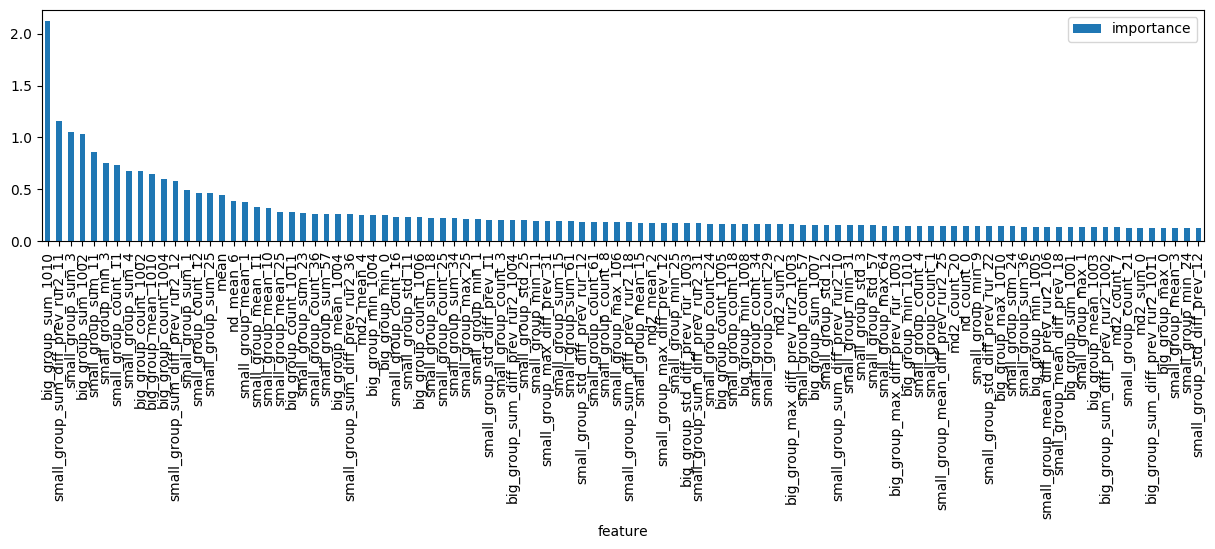

,importance
feature,
big_group_sum_1010,2.125218
small_group_sum_diff_prev_rur2_11,1.156429
small_group_sum_3,1.050917
big_group_sum_1002,1.032900
small_group_sum_11,0.859281
...,...
big_group_sum_diff_prev_rur2_1011,0.128697
big_group_max_0,0.128247
small_group_mean_3,0.127619


In [0]:
imp = df_importances.head(100)

imp.plot(kind='bar', figsize=(15, 3))
plt.show()
display(imp)
to_use = imp.index

In [0]:
# !pip uninstall lightgbm
# !pip install lightgbm
import lightgbm as lgb

In [0]:
lgb_clf = lgb.LGBMClassifier(num_class=4, device_type="cpu", objective="multiclass", n_estimators=500,learning_rate=0.05, max_depth=9, gamma=0.1, seed=42)

In [0]:
parameters = {'n_estimators':[250, 350, 450, 550, 650], 'learning_rate':[0.05, 0.1, 0.5], "num_leaves":[31, 48]}
clf_cv = GridSearchCV(lgb_clf, parameters, cv=4, verbose=10000)

In [0]:
lgb_clf.fit(x_data, y_data, eval_set=[(x_test, y_test)])

[1]	valid_0's multi_logloss: 1.35784
[2]	valid_0's multi_logloss: 1.33146
[3]	valid_0's multi_logloss: 1.3069
[4]	valid_0's multi_logloss: 1.28384
[5]	valid_0's multi_logloss: 1.26249
[6]	valid_0's multi_logloss: 1.24226
[7]	valid_0's multi_logloss: 1.22316
[8]	valid_0's multi_logloss: 1.20514
[9]	valid_0's multi_logloss: 1.18794
[10]	valid_0's multi_logloss: 1.17206
[11]	valid_0's multi_logloss: 1.15681
[12]	valid_0's multi_logloss: 1.14237
[13]	valid_0's multi_logloss: 1.12881
[14]	valid_0's multi_logloss: 1.11539
[15]	valid_0's multi_logloss: 1.10284
[16]	valid_0's multi_logloss: 1.09083
[17]	valid_0's multi_logloss: 1.07944
[18]	valid_0's multi_logloss: 1.06825
[19]	valid_0's multi_logloss: 1.05757
[20]	valid_0's multi_logloss: 1.04734
[21]	valid_0's multi_logloss: 1.03763
[22]	valid_0's multi_logloss: 1.02826
[23]	valid_0's multi_logloss: 1.01913
[24]	valid_0's multi_logloss: 1.01059
[25]	valid_0's multi_logloss: 1.00253
[26]	valid_0's multi_logloss: 0.994355
[27]	valid_0's multi_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device_type='cpu', gamma=0.1, importance_type='split',
               learning_rate=0.05, max_depth=9, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
               n_jobs=-1, num_class=4, num_leaves=31, objective='multiclass',
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, seed=42,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
# accuracy
# lgb_clf = clf_cv.best_estimator_
print("lgb_clf train: ", accuracy_score(y_train, lgb_clf.predict(x_train)))
print("lgb_clf test: ", accuracy_score(y_test, lgb_clf.predict(x_test)))

lgb_clf train:  0.9654166666666667
lgb_clf test:  0.965


In [0]:
# accuracy


print("Catboost train: ", accuracy_score(y_train, cat_clf.predict(x_train)))
print("Catboost test: ", accuracy_score(y_test, cat_clf.predict(x_test)))
print("Catboost ALL: ", accuracy_score(y_data, cat_clf.predict(x_data)))
cat_clf.get_all_params()

# good_p

Catboost train:  0.9452916666666666
Catboost test:  0.9421666666666667
Catboost ALL:  0.9446666666666667


{'add_ridge_penalty_to_loss_function': False,
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.1000000015,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 128,
 'classes_count': 4,
 'data_partition': 'DocParallel',
 'depth': 6,
 'devices': '-1',
 'eval_metric': 'MultiClass',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 64,
 'fold_size_loss_normalization': False,
 'gpu_cat_features_storage': 'GpuRam',
 'gpu_ram_part': 0.95,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 6500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.02999999933,
 'loss_function': 'MultiClass',
 'max_leaves': 64,
 'min_data_in_leaf': 1,
 'min_fold_size': 100,
 'nan_mode': 'Min',
 'observations_to_bootstrap': 'TestOnly',
 'permutation_count': 1,
 '

Catboost train:  0.8758119658119659
Catboost test:  0.6590909090909091
Catboost ALL:  0.8281333333333334

In [0]:
good_p

{'add_ridge_penalty_to_loss_function': False,
 'bagging_temperature': 1,
 'bayesian_matrix_reg': 0.1000000015,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'Bayesian',
 'border_count': 128,
 'classes_count': 4,
 'data_partition': 'DocParallel',
 'depth': 5,
 'devices': '-1',
 'eval_metric': 'MultiClass',
 'feature_border_type': 'GreedyLogSum',
 'fold_len_multiplier': 2,
 'fold_permutation_block': 64,
 'fold_size_loss_normalization': False,
 'gpu_cat_features_storage': 'GpuRam',
 'gpu_ram_part': 0.95,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 4500,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 1,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.02999999933,
 'loss_function': 'MultiClass',
 'max_leaves': 32,
 'min_data_in_leaf': 1,
 'min_fold_size': 100,
 'nan_mode': 'Min',
 'observations_to_bootstrap': 'TestOnly',
 'permutation_count': 1,
 '

In [0]:
# x_val

In [0]:
cat_pred = cat_clf.predict_proba(x_val)
cat_pred


array([[6.67494745e-01, 1.28507002e-02, 8.42327926e-03, 3.11231276e-01],
       [9.97540593e-02, 2.35069931e-04, 8.95007704e-01, 5.00316722e-03],
       [2.38175779e-01, 8.58138498e-02, 1.85595326e-03, 6.74154418e-01],
       ...,
       [7.04919941e-01, 1.64606121e-03, 2.69420138e-01, 2.40138598e-02],
       [3.12541155e-01, 8.31094740e-02, 5.24962851e-01, 7.93865201e-02],
       [2.09476435e-01, 1.36111006e-01, 6.78269344e-03, 6.47629866e-01]])

In [0]:
cat_clf2 = catboost.CatBoostClassifier()
cat_clf2.load_model("/content/drive/My Drive/submissions_nti/cat_5000iter_d6_test662_train95.clf_cat")

In [0]:
cat_clf = cat_clf2

Catboost train:  0.8747863247863248 \
Catboost test:  0.6580303030303031 \
Catboost ALL:  0.8271 \

In [0]:
lgb_pred = xgb_clf.predict_proba(x_val)
lgb_pred

array([[6.9778037e-01, 1.4741722e-02, 1.6323290e-03, 2.8584561e-01],
       [1.8205044e-01, 3.1606792e-04, 8.0910569e-01, 8.5277688e-03],
       [3.1154409e-01, 8.5260883e-02, 7.1415585e-04, 6.0248089e-01],
       ...,
       [5.6466997e-01, 2.4885887e-03, 4.0767884e-01, 2.5162557e-02],
       [3.8619044e-01, 1.2832777e-01, 4.3605849e-01, 4.9423277e-02],
       [4.2314407e-01, 9.3392678e-02, 5.5158553e-03, 4.7794741e-01]],
      dtype=float32)

In [0]:
dp = ((cat_pred + lgb_pred) / 2).argmax(axis=1)

In [0]:
cat_clf.predict_proba(x_val.drop("small_group_sum_1", axis=1))

array([[6.15819002e-01, 3.19268931e-02, 3.32156359e-02, 3.19038469e-01],
       [1.52181315e-01, 4.15348780e-04, 8.40759077e-01, 6.64425902e-03],
       [4.80853289e-01, 1.12798847e-01, 1.75742444e-02, 3.88773620e-01],
       ...,
       [5.42683961e-01, 3.74738899e-03, 4.15516112e-01, 3.80525384e-02],
       [3.12076319e-01, 4.52702243e-02, 5.47130588e-01, 9.55228694e-02],
       [2.80642274e-01, 2.63681307e-01, 4.32481012e-02, 4.12428319e-01]])

In [0]:
dp

array([0, 2, 3, ..., 0, 2, 3])

Catboost train:  0.7329333333333333 \
Catboost test:  0.6392 \
\
with out fillna \
Catboost train:  0.7501990049751244 \
Catboost test:  0.6332323232323233


In [0]:
xgb_pred = xgb_clf.predict(x_val)
xgb_pred

In [0]:
from sklearn.externals import joblib
# save model
joblib.dump(lgb_clf, '/content/drive/My Drive/submissions_nti/lgb_99train_655test_.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['/content/drive/My Drive/submissions_nti/lgb_99train_655test_.pkl']

In [0]:
from sklearn.externals import joblib
lgb_clf = joblib.load('/content/drive/My Drive/submissions_nti/lgb.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
lgb_clf

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               device_type='cpu', importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_class=4,
               num_leaves=31, objective='multiclass', random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

Сделаем предсказание.

In [0]:
cat_clf.save_model("/content/drive/My Drive/submissions_nti/cat_6000iter_d6_test93_train93_p644.clf_cat")
open("/content/drive/My Drive/submissions_nti/cat_6000iter_d6_test93_train93_p644.txt", "w+").write(str(list(x_train.columns)))

122673

На public лидерборде такое предсказание должно дать качество 0.6118.

### Подготовим файл для отправки в систему

In [0]:
pred = dp


submission = pd.DataFrame({'bins': pred}, index=val.client_id)
submission.head()

,bins
client_id,
28571,0
27046,2
13240,3
19974,0
10505,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f2104e550>]],
      dtype=object)

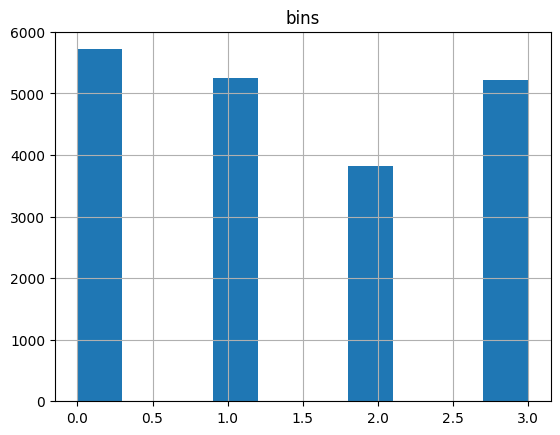

In [0]:

submission.hist()

Сохраняем прогноз на диск в папку submissions. Имя прогноза соответсвует дате и времени его создания, закодированными с помощью timestamp.

In [0]:
import time
import os

current_timestamp = int(time.time())
submission_path = '/content/drive/My Drive/submissions_nti/{}.csv'.format(current_timestamp)

if not os.path.exists('/content/drive/My Drive/submissions_nti'):
    os.makedirs('/content/drive/My Drive/submissions_nti')


print(submission_path)
submission.to_csv(submission_path, index=True)

/content/drive/My Drive/submissions_nti/1578500132.csv


In [0]:

from google.colab import drive


drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

data  data_v1.zip  data_v1.zip.1  drive  __MACOSX  sample_data


In [0]:
!rm -rf drive


In [0]:
!ls /content/drive

'My Drive'


Теперь все готово! Можно отправлять решение.

In [0]:
big_groups

'p_transport'

In [0]:
small_group_description["small_group"][102]

'Медицинское оборудование (ортопедические товары)'